In [1]:
! pip install scikit-plot

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/JupyterSystemEnv/bin/python -m pip install --upgrade pip' command.


In [2]:
from models import RNNModel
import numpy as np
import pandas as pd
from data import readLocally
from sklearn.metrics import confusion_matrix
from visualization import plot_roc_auc, pr_curve, format_vertical_headers, print_confusion_matrix, printModelData

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
X_train, y_train, X_test, y_test, X_val, y_val, labels_hash, scaler = readLocally()



_ _ _ _ _ _ _ _ _ _   READ DATA LOCALLY  _ _ _ _ _ _ _ _ _ _ 




SHAPES & KEYS:
    X_train          : (285428, 25, 12)   -> 48%
    y_train          : (285428,)
    X_test           : (237858, 25, 12)   -> 40%
    y_test           : (237858,)
    X_val            : (71357, 25, 12)   -> 12%
    y_val            : (71357,)
    ______________________
    Total Data Size  : 594643
    labels_hash Keys : dict_keys(['customer', 'age', 'gender', 'merchant', 'category'])
    
    TRAIN DATA
    ______________________
    Positives        : 3461   -> 1.21%
    Negatives        : 281967   -> 98.79%
    
    TEST DATA
    ______________________
    Positives        : 2839   -> 1.19%
    Negatives        : 235019   -> 98.81%   
    
    VAL DATA
    ______________________
    Positives        : 900   -> 1.26%
    Negatives        : 70457   -> 98.74%
    


In [4]:
pd.DataFrame(X_train[-1]).tail()

,0,1,2,3,4,5,6,7,8,9,10,11
20,0.688889,0.375,0.5,0.38,0.866667,0.002596,0.333333,0.004299,0.004299,0.5,0.866667,0.62
21,0.694444,0.375,0.5,0.38,0.866667,0.005279,0.333333,0.004289,0.004289,0.5,0.866667,0.62
22,0.700000,0.375,0.5,0.38,0.866667,0.004949,0.333333,0.004307,0.004307,0.5,0.866667,0.62
23,0.705556,0.375,0.5,0.38,0.866667,0.003046,0.333333,0.004321,0.004321,0.5,0.866667,0.62
24,0.711111,0.375,0.5,0.38,0.866667,0.008400,0.333333,0.004315,0.004315,0.5,0.866667,0.62


In [5]:
#Reshape to two dimensions
X_train1 = X_train[:, -1]
X_test1 = X_test[:, -1]
X_val1 = X_val[:, -1]
print("X_train: ", X_train1.shape)
print("X_test: ", X_test1.shape)
print("X_val: ", X_val1.shape)

print("\nX_train Sample: \n\n")
pd.DataFrame([X_train1[-1]])

X_train:  (285428, 12)
X_test:  (237858, 12)
X_val:  (71357, 12)

X_train Sample: 




,0,1,2,3,4,5,6,7,8,9,10,11
0,0.711111,0.375,0.5,0.38,0.866667,0.0084,0.333333,0.004315,0.004315,0.5,0.866667,0.62


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train.flatten()), y_train.flatten())
clf = RandomForestClassifier(random_state=0, class_weight = dict(enumerate(class_weights)), verbose=1)
clf.fit(X_train1, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.506137243010707,
                                     1: 41.23490320716556},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)


base_estimator_         

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


classes_                [0. 1.]
n_classes_              2
n_features_             12
n_outputs_              1



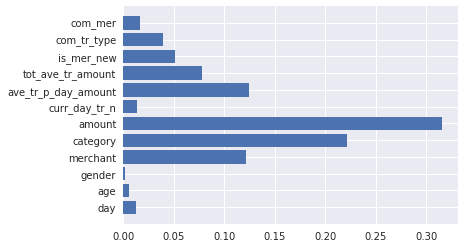

In [7]:
print("""
base_estimator_         \n\n{}\n\n
classes_                {}
n_classes_              {}
n_features_             {}
n_outputs_              {}
""".format(
    clf.base_estimator_   ,     
    clf.classes_        ,       
    clf.n_classes_        ,      
    clf.n_features_         ,   
    clf.n_outputs_            ,
))

import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset
columns=[
    "day", "age", "gender", "merchant", "category", "amount", 
    "curr_day_tr_n","ave_tr_p_day_amount", "tot_ave_tr_amount", "is_mer_new","com_tr_type", "com_mer",
#     "fraud"
]
y_index = np.arange(len(columns))
# Create horizontal bars
plt.barh( y_index, clf.feature_importances_ )
# Create names on the y-axis
plt.yticks(y_index, columns)
 
# Show graphic
plt.show()

In [8]:
from visualization import print_confusion_matrix
import matplotlib.pyplot as plt 
from sklearn import metrics
print("\n\n", 30*"*","RANDOM FOREST TEST METRICS",30*"*", "\n\n")

rf_y_pred = clf.predict_proba(X_test1)
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, rf_y_pred[:, 1].round()).ravel()
print_confusion_matrix(tn1, fp1, fn1, tp1)

print("\n\n", 30*"*","RANDOM FOREST VALIDATION METRICS",30*"*", "\n\n")

rf_y_val_pred = clf.predict_proba(X_val1)
tn2, fp2, fn2, tp2 = confusion_matrix(y_val, rf_y_val_pred[:, 1].round()).ravel()
print_confusion_matrix(tn2, fp2, fn2, tp2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




 ****************************** RANDOM FOREST TEST METRICS ****************************** 




[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



            PREDICTED CLASSES
            POSITIVE   | NEGATIVE
    _____________________________
    ACTUAL   |         |
    POSITIVE | TP: 2117   FN: 722
    _____________________________
    ACTUAL   |         |
    NEGATIVE | FP: 214   TN: 234805
    


 ****************************** RANDOM FOREST VALIDATION METRICS ****************************** 



            PREDICTED CLASSES
            POSITIVE   | NEGATIVE
    _____________________________
    ACTUAL   |         |
    POSITIVE | TP: 679   FN: 221
    _____________________________
    ACTUAL   |         |
    NEGATIVE | FP: 52   TN: 70405
    


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [9]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier( verbosity=1, random_state=0)
xgb_clf.fit(X_train1, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=1)

In [10]:
import matplotlib.pyplot as plt 
from sklearn import metrics

print("\n\n", 30*"*","XBGBOOST TEST METRICS",30*"*", "\n\n")

xgb_y_pred = clf.predict_proba(X_test1)
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, xgb_y_pred[:, 1].round()).ravel()
print_confusion_matrix(tn3, fp3, fn3, tp3)

print("\n\n", 30*"*","XBGBOOST VALIDATION METRICS",30*"*", "\n\n")

xgb_y_val_pred = clf.predict_proba(X_val1)
tn4, fp4, fn4, tp4 = confusion_matrix(y_val, xgb_y_val_pred[: , 1].round()).ravel()
print_confusion_matrix(tn4, fp4, fn4, tp4)



 ****************************** XBGBOOST TEST METRICS ****************************** 




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



            PREDICTED CLASSES
            POSITIVE   | NEGATIVE
    _____________________________
    ACTUAL   |         |
    POSITIVE | TP: 2117   FN: 722
    _____________________________
    ACTUAL   |         |
    NEGATIVE | FP: 214   TN: 234805
    


 ****************************** XBGBOOST VALIDATION METRICS ****************************** 



            PREDICTED CLASSES
            POSITIVE   | NEGATIVE
    _____________________________
    ACTUAL   |         |
    POSITIVE | TP: 679   FN: 221
    _____________________________
    ACTUAL   |         |
    NEGATIVE | FP: 52   TN: 70405
    


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [11]:
import joblib
joblib.dump(clf, "rf.model")
joblib.dump(xgb_clf, "xgboost.model")


['xgboost.model']

In [12]:
X_train2, y_train2, X_test2, y_test2, X_val2, y_val2, labels_hash2, scaler2 = readLocally()



_ _ _ _ _ _ _ _ _ _   READ DATA LOCALLY  _ _ _ _ _ _ _ _ _ _ 




SHAPES & KEYS:
    X_train          : (285428, 25, 12)   -> 48%
    y_train          : (285428,)
    X_test           : (237858, 25, 12)   -> 40%
    y_test           : (237858,)
    X_val            : (71357, 25, 12)   -> 12%
    y_val            : (71357,)
    ______________________
    Total Data Size  : 594643
    labels_hash Keys : dict_keys(['customer', 'age', 'gender', 'merchant', 'category'])
    
    TRAIN DATA
    ______________________
    Positives        : 3461   -> 1.21%
    Negatives        : 281967   -> 98.79%
    
    TEST DATA
    ______________________
    Positives        : 2839   -> 1.19%
    Negatives        : 235019   -> 98.81%   
    
    VAL DATA
    ______________________
    Positives        : 900   -> 1.26%
    Negatives        : 70457   -> 98.74%
    


In [13]:
print("CHECKPOINTS")
!ls *.h5
print("_______BEST MODELS_________")
!ls results/v7/*.h5

CHECKPOINTS
gru_2_checkpoint.h5
gru_3_0_200_lr_double_data.h5
gru_3_double_data_lr1_checkpoint.h5
gru_4_2_300_nol1_double_data_BACKUP.h5
gru_4_double_data_checkpoint.h5
gru_checkpoint.h5
gru_double_data_double_batch_checkpoint_no_l1.h5
gru_double_data_double_batch_no_l1.h5
gru_double_data_half_batch_checkpoint_no_l1.h5
gru_double_data_half_batch_no_l1.h5
gru_double_data_one_batch_1_layer_no_l1_checkpoint.h5
gru_double_data_one_batch_1_layer_no_l1.h5
gru_double_data_one_batch_double_weights_no_l1_checkpoint.h5
gru_double_data_one_batch_double_weights_no_l1.h5
gru_double_data_one_batch_SimpleRNN_no_l1_checkpoint.h5
gru_double_data_one_batch_SimpleRNN_no_l1.h5
gru_double_data_one_val_batch_checkpoint_no_l1.h5
gru_double_data_one_val_batch_no_l1.h5
lstm_2_checkpoint.h5
lstm_checkpoint.h5
_______BEST MODELS_________
results/v7/checkpoint_model.h5	results/v7/rnn_model_weights.h5
results/v7/rnn_model.h5


In [14]:
from tensorflow.keras.models import load_model
gru_1        = load_model("gru_checkpoint.h5")
gru_2        = load_model("gru_2_checkpoint.h5") 
lstm_1       = load_model("lstm_checkpoint.h5") 
lstm_2       = load_model("lstm_2_checkpoint.h5") 
best_rnn     = load_model("results/v7/rnn_model.h5") 
second_best_rnn    = load_model("results/v7/checkpoint_model.h5") 
rnn_double_data    = load_model("gru_3_0_200_lr_double_data.h5") 
rnn_double_data_l1 = load_model("gru_4_2_300_nol1_double_data_BACKUP.h5") 
rnn_double_data_batch_one  = load_model("gru_double_data_one_val_batch_no_l1.h5") 
rnn_double_data_batch_half = load_model("gru_double_data_half_batch_no_l1.h5")

In [15]:
rnn_double_data_batch_double = load_model("gru_double_data_double_batch_no_l1.h5") 
rnn_double_data_batch_one_double_weights = load_model("gru_double_data_one_batch_double_weights_no_l1.h5") 

In [16]:
rnn_double_data_batch_one_batch_one_layer = load_model("gru_double_data_one_batch_1_layer_no_l1.h5")

In [17]:
gru_double_data_one_batch_SimpleRNN_no_l1 = load_model("gru_double_data_one_batch_SimpleRNN_no_l1.h5") 

In [32]:
gru_double_data_2_rnn_layers_one_batch_1_layer_no_l1 = load_model("gru_double_data_2_rnn_layers_one_batch_1_layer_no_l1.h5") 

In [33]:
gru_oversampled_data_one_batch_no_l1 = load_model("gru_oversampled_data_one_batch_no_l1.h5")

In [18]:
best_rnn.summary()

Model: "sequential_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_120 (GRU)                (None, 50)                9600      
_________________________________________________________________
dense_240 (Dense)            (None, 300)               15300     
_________________________________________________________________
activation_240 (Activation)  (None, 300)               0         
_________________________________________________________________
dense_241 (Dense)            (None, 300)               90300     
_________________________________________________________________
activation_241 (Activation)  (None, 300)               0         
_________________________________________________________________
dropout_80 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_242 (Dense)            (None, 1)              

In [19]:
from visualization import plot_roc_auc, pr_curve, print_confusion_matrix

print("\n\n", 30*"*","RNN TEST METRICS",30*"*", "\n\n")

best_rnn_y_pred = best_rnn.predict(X_test2)
tn5, fp5, fn5, tp5 = confusion_matrix(y_test2, best_rnn_y_pred.round()).ravel()
print_confusion_matrix(tn5, fp5, fn5, tp5)

print("\n\n", 30*"*","RNN VALIDATION METRICS",30*"*", "\n\n")

best_rnn_val_y_pred = best_rnn.predict(X_val2)
tn6, fp6, fn6, tp6 = confusion_matrix(y_val2, best_rnn_val_y_pred.round()).ravel()
print_confusion_matrix(tn6, fp6, fn6, tp6)



 ****************************** RNN TEST METRICS ****************************** 



            PREDICTED CLASSES
            POSITIVE   | NEGATIVE
    _____________________________
    ACTUAL   |         |
    POSITIVE | TP: 1513   FN: 1326
    _____________________________
    ACTUAL   |         |
    NEGATIVE | FP: 173   TN: 234846
    


 ****************************** RNN VALIDATION METRICS ****************************** 



            PREDICTED CLASSES
            POSITIVE   | NEGATIVE
    _____________________________
    ACTUAL   |         |
    POSITIVE | TP: 490   FN: 410
    _____________________________
    ACTUAL   |         |
    NEGATIVE | FP: 59   TN: 70398
    


In [20]:
X_train3, y_train3, X_test3, y_test3, X_val3, y_val3, labels_hash3, scaler3 = readLocally()
#DIVIDE X_TEST IN HALF AND ADD IT TO X_TRAIN
test_half_pos   = int(len(X_test3)/2)
total_data_size = len(X_train3) + len(X_test3) + len(X_val3)

X_train3 = np.vstack( ( X_train3 ,  X_test3[0: test_half_pos ] ))
y_train3 = np.append( y_train3 ,  y_test3[0: test_half_pos ]  )

X_test3  = X_test3[ test_half_pos : ]
y_test3  = y_test3[ test_half_pos : ]

print("""INCREASED TRAIN SET -> NEW SIZES
X_train: {}
y_train: {}         {:0.0f}% {:0.2f}P% {:0.2f}N%
X_test : {}
y_test : {}         {:0.0f}% {:0.2f}P% {:0.2f}N%
X_val  : {}
y_val  : {}         {:0.0f}% {:0.2f}P% {:0.2f}N%
""".format(
    X_train3.shape, y_train3.shape, len(X_train3) * 100 / total_data_size,  len(y_train3[y_train3==1]) * 100 / len(y_train3) , len(y_train3[y_train3==0]) * 100 / len(y_train3) ,
    X_test3.shape, y_test3.shape,   len(X_test3)  * 100  / total_data_size, len(y_test3[y_test3==1])   * 100 / len(y_test3)  , len(y_test3[y_test3==0])   * 100 / len(y_test3) ,
    X_val3.shape,  y_val3.shape,    len(X_val3)   * 100  / total_data_size, len(y_val3[y_val3==1])     * 100 / len(y_val3)   , len(y_val3[y_val3==0])     * 100 / len(y_val3) ,
))

#Reduce Data to half the size per batch

X_train4 = X_train3[:,12:]
X_test4 = X_test3[:,  12:]
X_val4 = X_val3[:,  12: ]

X_train5 = X_train3[:,-1].reshape( len(X_train3), 1, 12 )
X_test5  = X_test3[:,  -1].reshape( len(X_test3), 1, 12 )
X_val5   = X_val3[:,  -1].reshape( len(X_val3), 1, 12 )

print("X_train 4: {}->{}".format(X_train3.shape, X_train4.shape))
print("X_test  4: {}->{}".format(X_test3.shape,  X_test4.shape))
print("X_val  4: {}->{}\n\n".format(X_val3.shape,   X_val4.shape))

print("X_train 5: {}->{}".format(X_train3.shape, X_train5.shape))
print("X_test  5: {}->{}".format(X_test3.shape,  X_test5.shape))
print("X_val   5: {}->{}\n\n".format(X_val3.shape,   X_val5.shape))

print("X_train 1 Sample: \n\n")
print(pd.DataFrame(X_train4[-1]))

print("X_train 2 Sample: \n\n")
print(pd.DataFrame(X_train5[-1]))



_ _ _ _ _ _ _ _ _ _   READ DATA LOCALLY  _ _ _ _ _ _ _ _ _ _ 




SHAPES & KEYS:
    X_train          : (285428, 25, 12)   -> 48%
    y_train          : (285428,)
    X_test           : (237858, 25, 12)   -> 40%
    y_test           : (237858,)
    X_val            : (71357, 25, 12)   -> 12%
    y_val            : (71357,)
    ______________________
    Total Data Size  : 594643
    labels_hash Keys : dict_keys(['customer', 'age', 'gender', 'merchant', 'category'])
    
    TRAIN DATA
    ______________________
    Positives        : 3461   -> 1.21%
    Negatives        : 281967   -> 98.79%
    
    TEST DATA
    ______________________
    Positives        : 2839   -> 1.19%
    Negatives        : 235019   -> 98.81%   
    
    VAL DATA
    ______________________
    Positives        : 900   -> 1.26%
    Negatives        : 70457   -> 98.74%
    
INCREASED TRAIN SET -> NEW SIZES
X_train: (404357, 25, 12)
y_train: (404357,)         68% 1.20P% 98.80N%
X_test : (118929, 25, 12)
y_test : (

In [21]:
import pickle
X_val6 = pickle.load(open( "X_val_db.data"         , "rb" ) )
y_val6 = pickle.load(open( "y_val_db.data"         , "rb" ) )

In [22]:
rnn_double_data_batch_double_val = rnn_double_data_batch_double.predict_proba(X_val6)

In [23]:
rnn_double_data_batch_one_double_weights_val = rnn_double_data_batch_one_double_weights.predict_proba(X_val5)

In [24]:
lstm_1_pred_test = lstm_1.predict_proba(X_test2)
lstm_2_pred_test = lstm_2.predict_proba(X_test2) 
gru_1_pred_test  = gru_1.predict_proba(X_test2)
gru_2_pred_test  = gru_2.predict_proba(X_test2)

second_best_rnn_test    = second_best_rnn.predict_proba(X_test2)
rnn_double_data_test    = rnn_double_data.predict_proba(X_test2)
rnn_double_data_l1_test = rnn_double_data_l1.predict_proba(X_test2)

lstm_1_pred_val = lstm_1.predict_proba(X_val2)
lstm_2_pred_val = lstm_2.predict_proba(X_val2) 
gru_1_pred_val  = gru_1.predict_proba(X_val2)
gru_2_pred_val  = gru_2.predict_proba(X_val2)

second_best_rnn_val    = second_best_rnn.predict_proba(X_val2)
rnn_double_data_val    = rnn_double_data.predict_proba(X_val2)
rnn_double_data_l1_val = rnn_double_data_l1.predict_proba(X_val2)

rnn_double_data_l1_val = rnn_double_data_l1.predict_proba(X_val2)

In [25]:
rnn_double_data_batch_one_val  = rnn_double_data_batch_one.predict_proba(X_val5)
rnn_double_data_batch_half_val = rnn_double_data_batch_half.predict_proba(X_val4)

In [26]:
rnn_double_data_batch_one_batch_one_layer_val = rnn_double_data_batch_one_batch_one_layer.predict_proba(X_val5)

In [27]:
gru_double_data_one_batch_SimpleRNN_no_l1_val = gru_double_data_one_batch_SimpleRNN_no_l1.predict_proba(X_val5)

In [35]:
gru_double_data_2_rnn_layers_one_batch_1_layer_no_l1_val = gru_double_data_2_rnn_layers_one_batch_1_layer_no_l1.predict_proba(X_val2)
gru_oversampled_data_one_batch_no_l1_val                 = gru_oversampled_data_one_batch_no_l1.predict_proba(X_val5)

In [28]:
import warnings
warnings.filterwarnings("ignore")
    
middle = lambda x, i: np.argwhere(x > i)[-1]
greater_than = lambda x, i: np.argwhere(x >= i)[0]
random_values = list()

def plot_pr_curves(pr_rc_data):
    line_styles  = ['-', '--', '-.', '-', '--', '-.', '--', '-.', '-', "--", "-.", '-.', '-', '-', '-.', '-', '--', '-.', '-', '--', '-.', '--', '-.',  '-', "--", "-.", '-.', '-', '-', '-.']
    colors = ["blue", "green", "orange","cyan", "green",  "blue", "magenta", "green","orange","cyan","orange","cyan", "green", "magenta", "blue", "green", "orange","cyan", "green",  "blue", "magenta", "green","orange","cyan","orange","cyan", "green", "magenta" ]
    an_y_point = np.arange( 0.1 , 1.1, 1/len(pr_rc_data) )
    fig = plt.figure(figsize=(20,10))
    
    pr_rc_data = np.array(pr_rc_data)
    recall_middle_vals = list()
    for index, pr_rc_values in enumerate(pr_rc_data):
        y, y_pr, label = pr_rc_values
        average_precision = metrics.average_precision_score(y, y_pr)
        recall_middle_vals.append(average_precision)
    
    recall_middle_indexes = np.argsort(recall_middle_vals)
    pr_rc_data = pr_rc_data[recall_middle_indexes]
        
    for index, pr_rc_values in enumerate(pr_rc_data):
        y, y_pr, label = pr_rc_values
        precision, recall, thresholds = metrics.precision_recall_curve(y, y_pr)
        average_precision = np.round( metrics.average_precision_score(y, y_pr) , 2)
        pr_auc = np.round( metrics.auc(recall, precision), 2)
        plt.plot(recall, precision, linestyle=line_styles[index],linewidth=5, color=colors[index], label = '{}-Ave-PRE={:0.2f}'.format(label, average_precision))
#         plt.legend(loc = 'lower right')
        tn, fp, fn, tp = confusion_matrix(y, y_pr.round()).ravel()
        random_line = tp/(tp+tn) 
        random_values.append(random_line)
#         plt.plot([0,1], [random_line, random_line], "r--" ) #, label=label+"_RANDOM"
        mid_index = middle(recall, 0.8) 
        plt.annotate(
            "{} ({})".format(label, average_precision), 
            xy=(
                recall[mid_index], precision[mid_index]
            ),
            xytext=( 1.07,  an_y_point[index] ) ,
            horizontalalignment="center",
            arrowprops=dict(arrowstyle='->',lw=2),
            fontsize="x-large",
            fontweight="bold",
            color=colors[index]
        )
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.draw()
    plt.title('PR CURVE')
    print("RANDOM: ", np.mean(random_values).round(3) )
    plt.plot([0,1], [np.mean(random_values), np.mean(random_values)], "r--" ) #, label=label+"_RANDOM"
#     plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()


def plot_roc_curves(pr_rc_data):
    line_styles = ['-', '--', '-.', '-', '--', '-.', '--', '-.',  '-', "--", "-.", '-.', '-', '-', '-.', '-', '--', '-.', '-', '--', '-.', '--', '-.',  '-', "--", "-.", '-.', '-', '-', '-.']
    colors = ["blue", "green", "orange","cyan", "green",  "blue", "magenta", "green","orange","cyan","orange","cyan", "green", "magenta", "blue", "green", "orange","cyan", "green",  "blue", "magenta", "green","orange","cyan","orange","cyan", "green", "magenta" ]
    an_y_point = np.arange( 0.1 , 1.1, 1/len(pr_rc_data) )
    fig = plt.figure(figsize=(20,10))
    
    pr_rc_data = np.array(pr_rc_data)
    auc_middle_vals = list()
    for index, pr_rc_values in enumerate(pr_rc_data):
        y, y_pr, label = pr_rc_values
        roc_auc = metrics.roc_auc_score(y, y_pr)
        auc_middle_vals.append(roc_auc)
    
    auc_middle_indexes = np.argsort(auc_middle_vals)
    pr_rc_data = pr_rc_data[auc_middle_indexes]
        
    for index, pr_rc_values in enumerate(pr_rc_data):
        y, y_pr, label = pr_rc_values
        fpr, tpr, thresholds = metrics.roc_curve(y, y_pr)
        roc_auc = np.round( metrics.roc_auc_score(y, y_pr), 2)
        plt.title('ROC CURVE')
        plt.plot(fpr, tpr, linestyle=line_styles[index],linewidth=5, color=colors[index], label = '{}-AUC={:0.2f}'.format(label, roc_auc))
#         plt.legend(loc = 'lower right')
        tn, fp, fn, tp = confusion_matrix(y, y_pr.round()).ravel()
        random_line = tp/(tp+tn) 
        mid_index = greater_than(tpr, 0.9) 
        plt.annotate(
            "{} ({})".format(label, roc_auc), 
            xy=(
                fpr[mid_index], tpr[mid_index]
            ),
            xytext=( -0.2,  an_y_point[index] ) ,
            horizontalalignment="center",
            arrowprops=dict(arrowstyle='->',lw=2),
            fontsize="x-large",
            fontweight="bold",
            color=colors[index]
        )
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.draw()
#     plt.legend(bbox_to_anchor=(0, 1.05), fontsize="x-large")
    plt.plot([0,1], [0, 1], "r--" ) #, label=label+"_RANDOM"
    plt.show()

VALIDATION DATA
RANDOM:  0.065


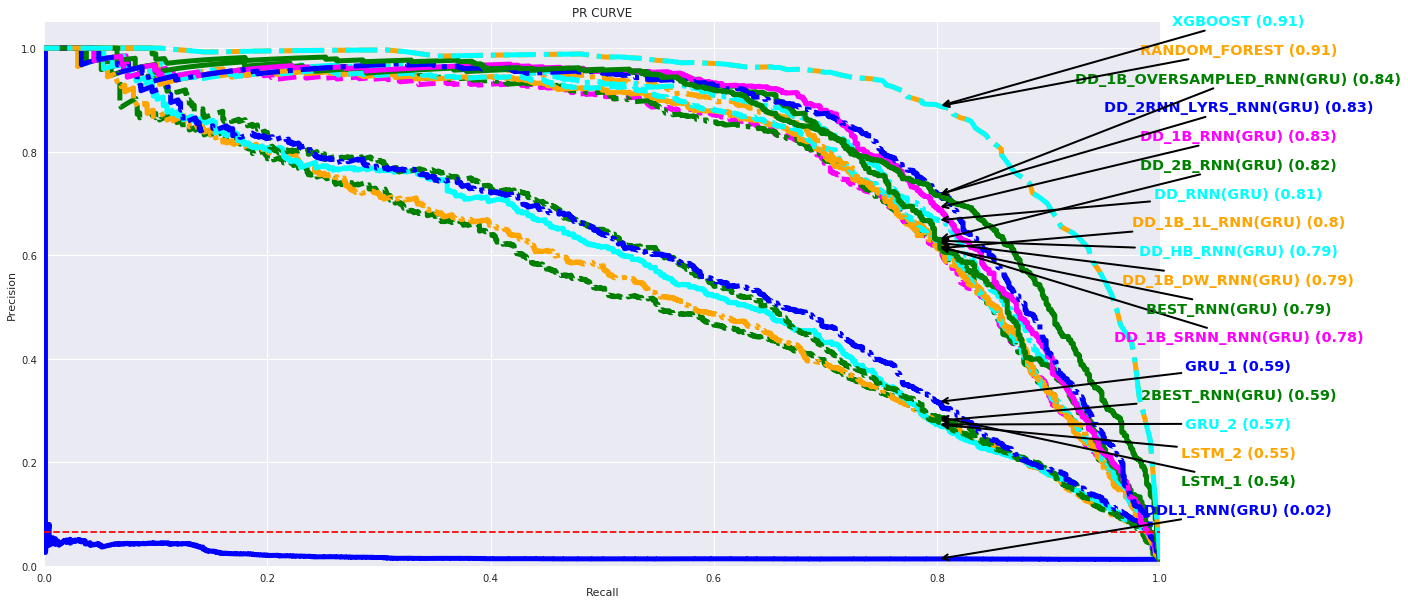

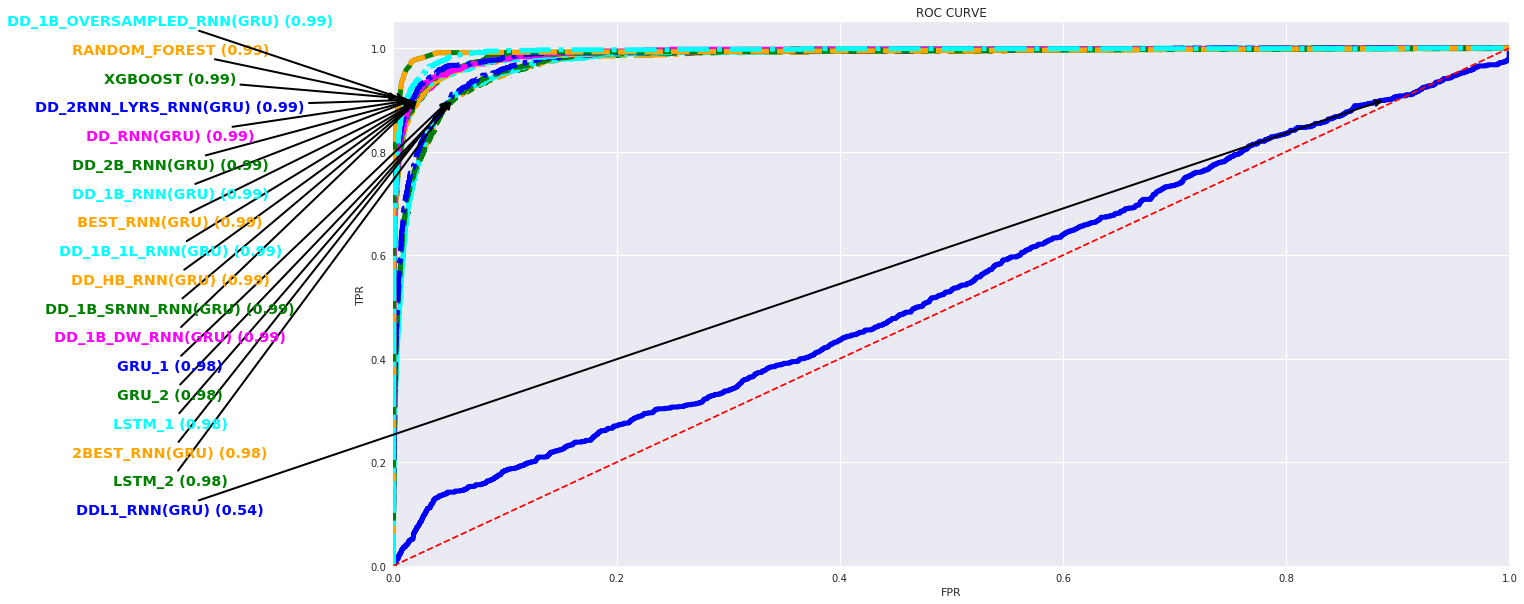

In [36]:
print("VALIDATION DATA")
pr_rc_data_val = [
    [y_val, xgb_y_val_pred[:, 1], "XGBOOST"],
    [y_val, rf_y_val_pred[:, 1], "RANDOM_FOREST"],
    [y_val2, lstm_1_pred_val , "LSTM_1"], 
    [y_val2, lstm_2_pred_val , "LSTM_2"],
    [y_val2, gru_2_pred_val , "GRU_2"], 
    [y_val2, gru_1_pred_val , "GRU_1"], 
    [y_val2, best_rnn_val_y_pred, "BEST_RNN(GRU)"],
    [y_val2, second_best_rnn_val, "2BEST_RNN(GRU)"],
    [y_val2, rnn_double_data_val, "DD_RNN(GRU)"],
    [y_val2, rnn_double_data_l1_val, "DDL1_RNN(GRU)"],
    [y_val3, rnn_double_data_batch_one_val, "DD_HB_RNN(GRU)"],   
    [y_val3, rnn_double_data_batch_half_val, "DD_1B_RNN(GRU)"], 
    [y_val6, rnn_double_data_batch_double_val, "DD_2B_RNN(GRU)"],  
    [y_val3, rnn_double_data_batch_one_double_weights_val, "DD_1B_DW_RNN(GRU)"],  
    [y_val3, rnn_double_data_batch_one_batch_one_layer_val, "DD_1B_1L_RNN(GRU)"],   
    [y_val3, gru_double_data_one_batch_SimpleRNN_no_l1_val, "DD_1B_SRNN_RNN(GRU)"],   
    [y_val2, gru_double_data_2_rnn_layers_one_batch_1_layer_no_l1_val, "DD_2RNN_LYRS_RNN(GRU)"],   
    [y_val3, gru_oversampled_data_one_batch_no_l1_val, "DD_1B_OVERSAMPLED_RNN(GRU)"],   

]
plot_pr_curves(pr_rc_data_val)
plot_roc_curves(pr_rc_data_val)


# changes batches sizes to 1-> Same as RF, XGBoost, 12, 25, 50
# shuffle data
# check L1 hyper-parameters, play with class weights, double it, reduce it
# change the early stopping to check for va_precision
#  PROBAR tf.keras.layers.SimpleRNN en vez GRU, LSTM para aprender menos weights

# ADD MORE RNN LAYER
# 